# Neural Network Training

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Importing 4 Seasons of NBA Data (2020-2024)

In [4]:
season_20 = pd.read_csv('../data_generation/output_data/2020-21_data.csv')
season_21 = pd.read_csv('../data_generation/output_data/2021-22_data.csv')
season_22 = pd.read_csv('../data_generation/output_data/2022-23_data.csv')
season_23 = pd.read_csv('../data_generation/output_data/2023-24_data.csv')

combined_seasons = pd.concat([season_20, season_21, season_22, season_23], ignore_index=True)
combined_season = combined_seasons.drop_duplicates()
combined_seasons = combined_seasons.reset_index(drop=True)

# combined_seasons.head(10)

## Prepare features and target value

In [15]:
# Drop target and prepare input
input = combined_seasons.drop(columns=['PTS'])
target = combined_seasons['PTS']

# Load selected features
spearman_corr = pd.read_csv('../data_generation/output_data/spearman_corr_features.csv')
selected_features = spearman_corr['Feature'].tolist()
selected_features.append('teamId')

# Ensure no mismatching features
existing_features = [feature for feature in selected_features if feature in input.columns]

# # Filter for Boston Celtics data for testing
# bos_team_id = 1610612738
# boston_data = combined_seasons.loc[combined_seasons["teamId"] == bos_team_id]
# # print(boston_data.info()) 318 entries

# existing_features.remove('teamId')

# # Create input_test and target_test specifically for Boston Celtics
# input_test_bos = boston_data[existing_features]
# target_test_bos = boston_data['PTS']

# Create input for general model
input = combined_seasons[existing_features]
input = input.dropna(axis=1)
# print(input.info())  # 126 cols, 9540 rows

# Split into train and test set
input_train, input_test, target_train, target_test = train_test_split(input, target, test_size=0.2, random_state=0)

# Scale features
scaler = StandardScaler()
input_train = scaler.fit_transform(input_train)
input_test = scaler.transform(input_test)

# input_test_bos = scaler.fit_transform(input_test_bos)

## Define the model

In [8]:
# Initialize sequential model 
model = Sequential([
    Input(shape=(input_train.shape[1],)), # define input shape
    Dense(64, activation='relu'), # first hidden layer with 64 units
    Dropout(0.2), 
    Dense(32, activation='relu'), # second hidden layer with 32 units
    Dense(1) # Output layer with target (PTS)
])

# Compile the model 
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(input_train, target_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 10297.9697 - mae: 98.6177 - val_loss: 721.3893 - val_mae: 21.2832
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 755.3297 - mae: 22.2768 - val_loss: 484.8841 - val_mae: 17.7727
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 569.7076 - mae: 19.2374 - val_loss: 409.6298 - val_mae: 16.2586
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 475.0464 - mae: 17.4236 - val_loss: 370.9289 - val_mae: 15.4753
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 446.7646 - mae: 16.9353 - val_loss: 326.4274 - val_mae: 14.5623
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 401.7057 - mae: 16.1602 - val_loss: 301.3380 - val_mae: 14.0154
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 379.1034 - mae: 15.6674 - val_loss: 277.7659 - val_mae: 13.4130
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 336.6230 - mae: 14.6576 - val_loss: 251.6352 - val_mae: 12.7845
Epoch 

## Visualize History

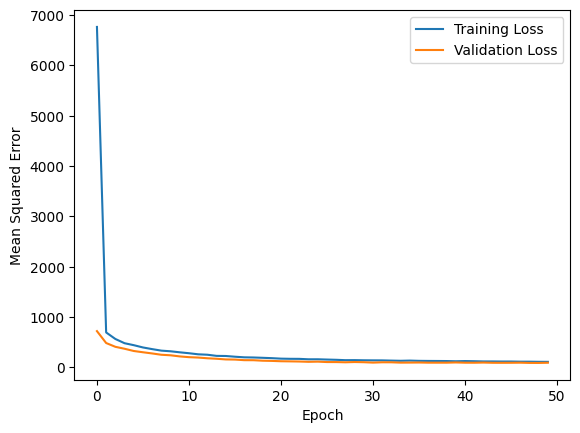

In [9]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

## General Model Evaluation and Sample Target Prediction

In [10]:
# Evaluate model on test data
test_loss, test_mae = model.evaluate(input_test, target_test)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

# Target prediction
sample_predictions = model.predict(input_test)
print("Sample Predictions (PTS):", sample_predictions[:10].flatten())
print("Actual Vales (PTS):", target_test[:10].values)

mse = mean_squared_error(target_test, sample_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(target_test, sample_predictions)

print("\n--- Regression Metrics ---")
print(f"Test Loss (MSE from model): {test_loss:.2f}")
print(f"Test MAE (from model): {test_mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 88.4715 - mae: 7.4546
Test Loss (MSE): 88.19813537597656
Test MAE: 7.493849754333496
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Sample Predictions (PTS): [106.22299  105.56248  121.57629  111.813034 110.91684  107.883705
 103.19351  100.721245 112.71402  119.628525]
Actual Vales (PTS): [122 123 127 100 111  92  86 123 114 122]

--- Regression Metrics ---
Test Loss (MSE from model): 88.20
Test MAE (from model): 7.49
Mean Squared Error (MSE): 88.20
Root Mean Squared Error (RMSE): 9.39
R-Squared (R²): 0.45


### Results from the Model Trained Specifically on Boston Celtics Data

#### Regression Metrics
- **Test Loss (MSE from model):** 713.21  
- **Test MAE (from model):** 21.63  
- **Mean Squared Error (MSE):** 713.21  
- **Root Mean Squared Error (RMSE):** 26.71  
- **R-Squared (R²):** -2.67  

#### Sample Predictions vs. Actual Values
| Prediction (PTS) | Actual (PTS) |
|------------------|--------------|
| 120.49           | 119          |
| 114.38           | 133          |
| 72.36            | 119          |
| 128.17           | 132          |
| 94.97            | 142          |
| 95.54            | 143          |
| 125.48           | 119          |
| 96.15            | 123          |
| 94.50            | 117          |
| 95.56            | 106          |


## Evaluation of General Model on Boston Celctics Target Prediction

In [11]:
# Evaluate model and test data
# print("input_test_bos shape:", input_test_bos.shape)
# print("target_test_bos shape:", target_test_bos.shape)

test_loss, test_mae = model.evaluate(input_test_bos, target_test_bos)

# Target prediction
bos_predictions = model.predict(input_test_bos)

mse = mean_squared_error(target_test_bos, bos_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(target_test_bos, bos_predictions)

print("Sample Prediction (PTS):", bos_predictions[:10].flatten())
print("Actual Values (PTS):", target_test_bos[:10].values)

print("\n--- Regression Metrics ---")
print(f"Test Loss (MSE from model): {test_loss:.2f}")
print(f"Test MAE (from model): {test_mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")

bos_results = pd.DataFrame({
    "Actual PTS": target_test,
    "Predicted PTS": sample_predictions.flatten()
})
# bos_results.to_csv("gen_model_boston_celtics_eval.csv", index=False)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 86.5777 - mae: 7.3153
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Sample Prediction (PTS): [121.604836  95.76926  114.24071  109.04957  120.81979  118.4474
 126.02377  108.20302  105.77681  116.19849 ]
Actual Values (PTS): [122  95 107 116 126  93 122 126 107 116]

--- Regression Metrics ---
Test Loss (MSE from model): 96.94
Test MAE (from model): 7.86
Mean Squared Error (MSE): 96.94
Root Mean Squared Error (RMSE): 9.85
R-Squared (R²): 0.45


## Comparison of Boston Celtics-Trained Model vs. General Model Tested on Boston Celtics Data

#### Boston Celtics-Trained Model Metrics
- **Test Loss (MSE from model):** 713.21  
- **Test MAE (from model):** 21.63  
- **Mean Squared Error (MSE):** 713.21  
- **Root Mean Squared Error (RMSE):** 26.71  
- **R-Squared (R²):** -2.67  

#### General Model Tested on Boston Celtics Data Metrics
- **Test Loss (MSE from model):** 106.62  
- **Test MAE (from model):** 8.34  
- **Mean Squared Error (MSE):** 106.62  
- **Root Mean Squared Error (RMSE):** 10.33  
- **R-Squared (R²):** 0.40  

#### Sample Predictions vs. Actual Values
| **Celtics-Trained Model Predictions (PTS)** | **Celtics Actual Values (PTS)** | **General Model Predictions (PTS)** | **Celtics Actual Values (PTS)** |
|---------------------------------------------|---------------------------------|-------------------------------------|---------------------------------|
| 120.49                                      | 119                             | 108.32                              | 122                             |
| 114.38                                      | 133                             | 95.37                               | 95                              |
| 72.36                                       | 119                             | 115.89                              | 107                             |
| 128.17                                      | 132                             | 106.85                              | 116                             |
| 94.97                                       | 142                             | 121.97                              | 126                             |
| 95.54                                       | 143                             | 118.78                              | 93                              |
| 125.48                                      | 119                             | 124.14                              | 122                             |
| 96.15                                       | 123                             | 107.94                              | 126                             |
| 94.50                                       | 117                             | 102.95                              | 107                             |
| 95.56                                       | 106                             | 116.08                              | 116                             |


In [14]:
# Save the trained model to a file
# model.save("general_nn_score_predictor.keras")
# print("Model saved as 'general_nn_score_predictor.keras'")

Model saved as 'general_nn_score_predictor.keras'
